<h3> Import required modules

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from matplotlib import style
style.use('ggplot')
warnings.filterwarnings('ignore')

<h4> Read in the dataset

In [228]:
df= pd.read_csv('/Users/Brenden/Downloads/Dataset/stroke.csv')

<h3> Display the dataset

In [229]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [230]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


<h4> Check the dataset dimensions

In [231]:
df.shape

(5110, 12)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<h3> Data preprocessing

In [233]:
#change all columns names to lowercase
df.columns= df.columns.str.lower()

<h4> Check for missing values

In [234]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [235]:
#fillin bmi null values with mean
df['bmi']= df['bmi'].fillna(df['bmi'].mean())

<h4> Check for duplicate values

In [236]:
df.duplicated().sum()

0

<h4> Drop unnecessary columns

In [237]:
df.drop('id',axis=1 ,inplace=True)

In [238]:
#change age data type from float to int
df['age']= df['age'].astype(int)

<h3> Encode categorical data

In [239]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [240]:
cat= ['gender','ever_married','work_type','residence_type','smoking_status']

for i,col in enumerate(cat):
    df[col]= le.fit_transform(df[col])

In [241]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,28.893237,2,1
2,1,80,0,1,1,2,0,105.92,32.500000,2,1


<h3> EDA of numerical columns

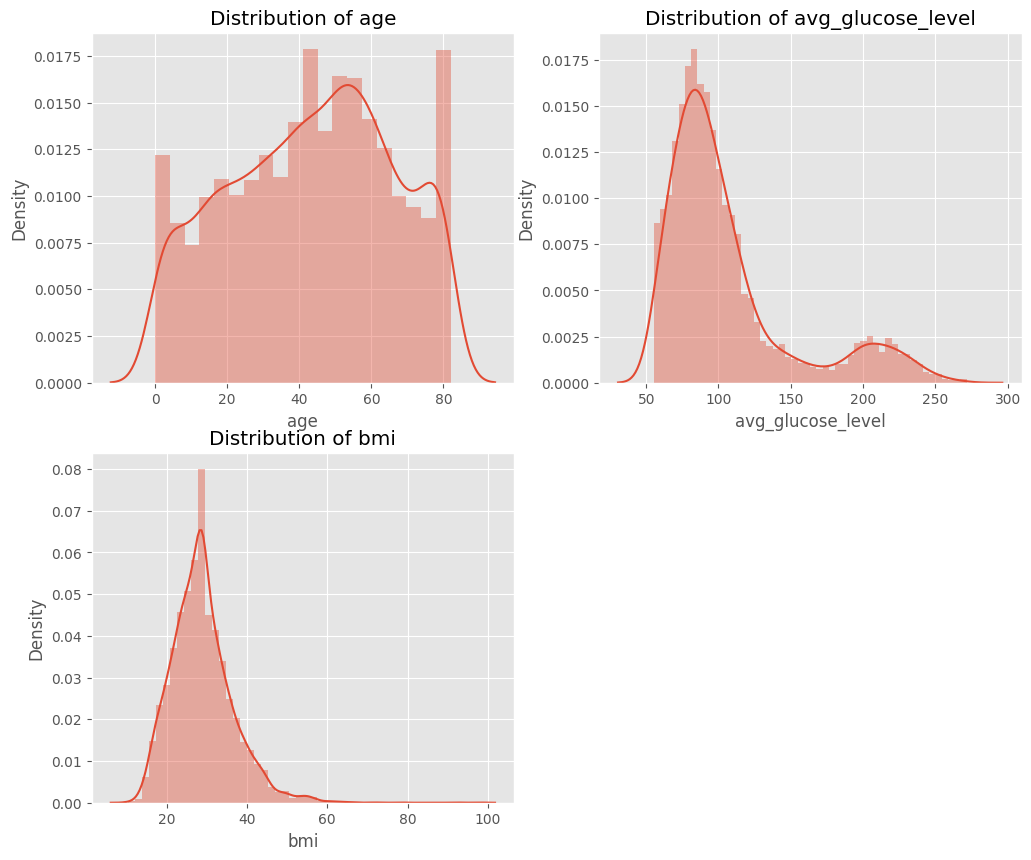

In [242]:
num= ['age','avg_glucose_level','bmi']

plt.figure(figsize=(12,10))

for i,col in enumerate(num):
    plt.subplot(2,2, i +1)
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')

plt.show()

<h3> EDA for categorical data

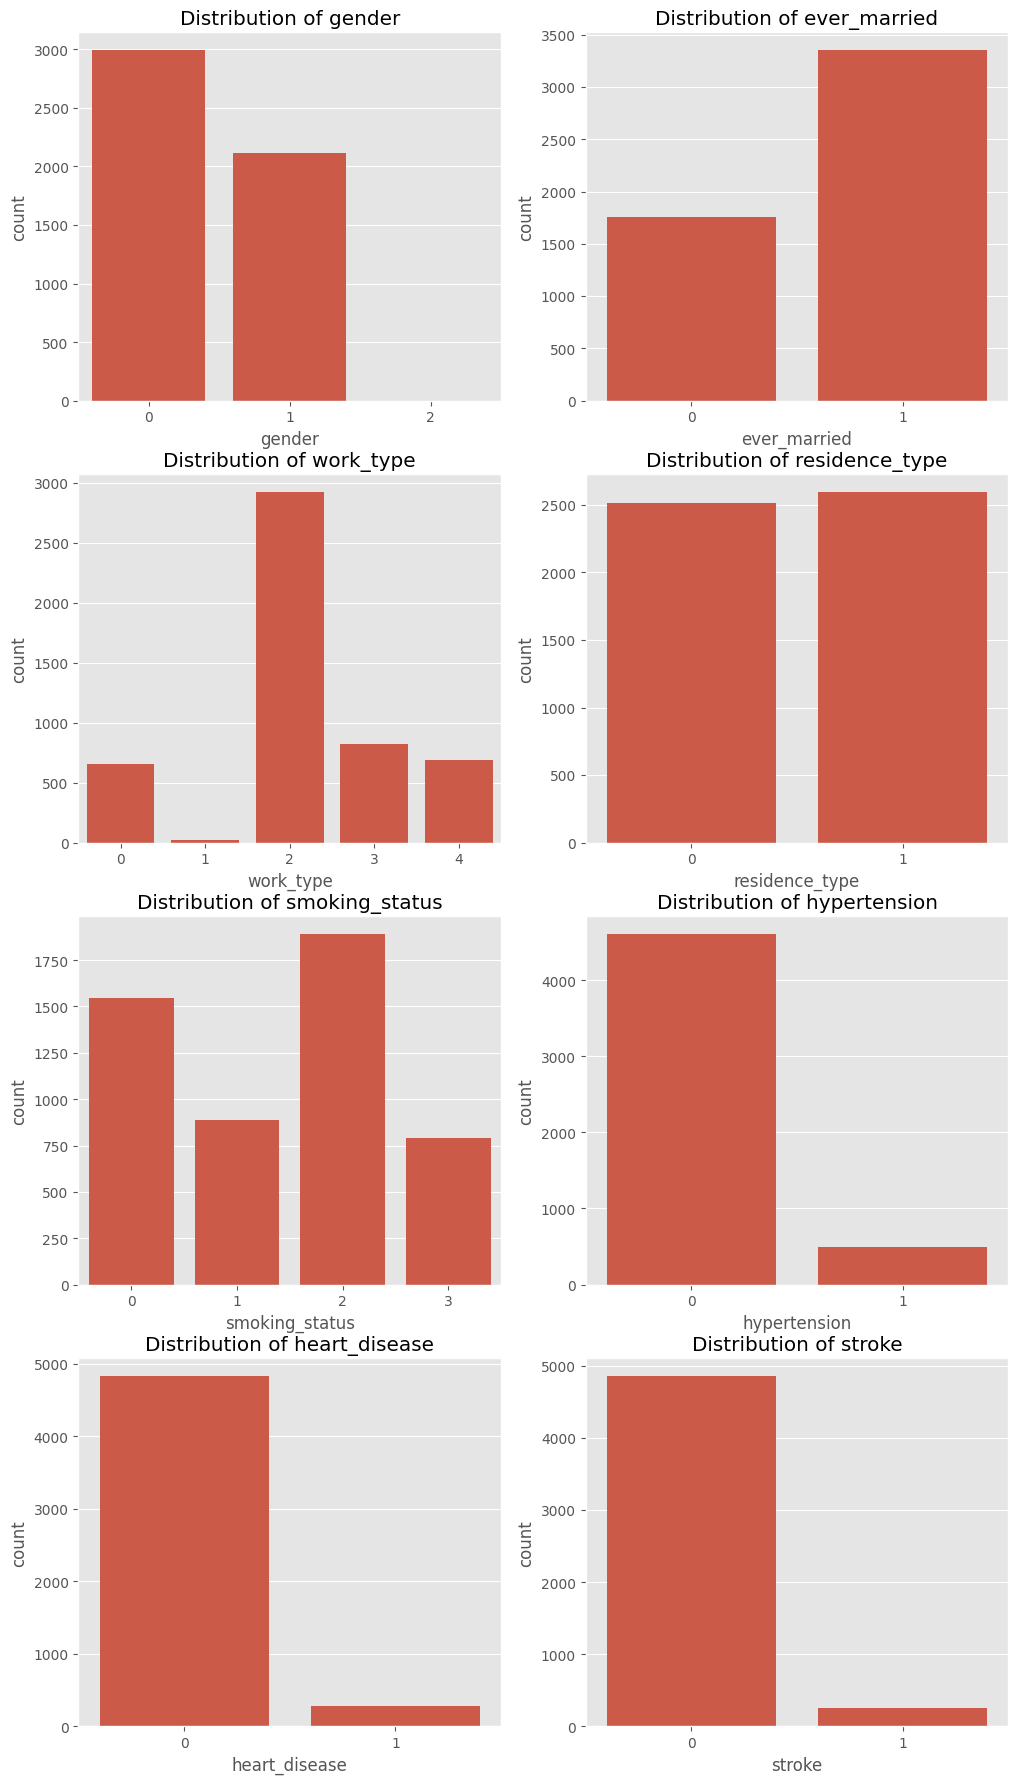

In [244]:
cat= ['gender','ever_married','work_type','residence_type','smoking_status','hypertension','heart_disease','stroke']

plt.figure(figsize=(12,22))

for i,col in enumerate(cat):
    plt.subplot(4,2, i +1)
    sns.countplot(df,x= col)
    plt.title(f'Distribution of {col}')

plt.show()

In [245]:
#split features & target variables
feat= df.drop('stroke',axis=1)
target= df['stroke']

<h3> Resample the unbalanced dataset

In [246]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=0)

In [247]:
feat_re,target_re= smote.fit_resample(feat,target)
print(feat.shape,target.shape)

(5110, 10) (5110,)


<h4> Standardize numerical values

In [248]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [249]:
num = ['bmi', 'avg_glucose_level']

for i, col in enumerate(num):
    feat_re[col] = sc.fit_transform(feat_re[col].values.reshape(-1,1))

In [251]:
feat_re.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,1,67,0,1,1,2,1,2.005906,1.102701,1
1,0,61,0,0,1,3,0,1.524493,-0.074903,2
2,1,80,0,1,1,2,0,-0.226084,0.476216,2
3,0,49,0,0,1,2,1,0.961268,0.766538,3
4,0,79,1,0,1,3,0,1.013809,-0.822597,2


<h3> Split the dataset into training & testing sets

In [252]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(feat_re,target_re,test_size=0.20,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7777, 10) (1945, 10) (7777,) (1945,)


<h3> Train the models

In [263]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

<H4> RandomForestClassifier

In [255]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [256]:
y_pred= rf.predict(X_test)
acc1= accuracy_score(y_test,y_pred)
acc1

0.9501285347043702

<h4> GradientBoostingClassifier

In [257]:
gb= GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [258]:
y_pred= gb.predict(X_test)
acc2= accuracy_score(y_test,y_pred)
acc2

0.8580976863753214

<h4> LogisticRegression

In [259]:
lr= LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [260]:
y_pred= lr.predict(X_test)
acc3= accuracy_score(y_test,y_pred)
acc3

0.7820051413881748

<h4> DecisionTreeClassifier

In [265]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [266]:
y_pred= dt.predict(X_test)
acc4= accuracy_score(y_test,y_pred)
acc4

0.9069408740359897

<h3> Model Performance

In [269]:
score= pd.Series([acc1,acc2,acc3,acc4],['RF','GBC','LR','DT'])

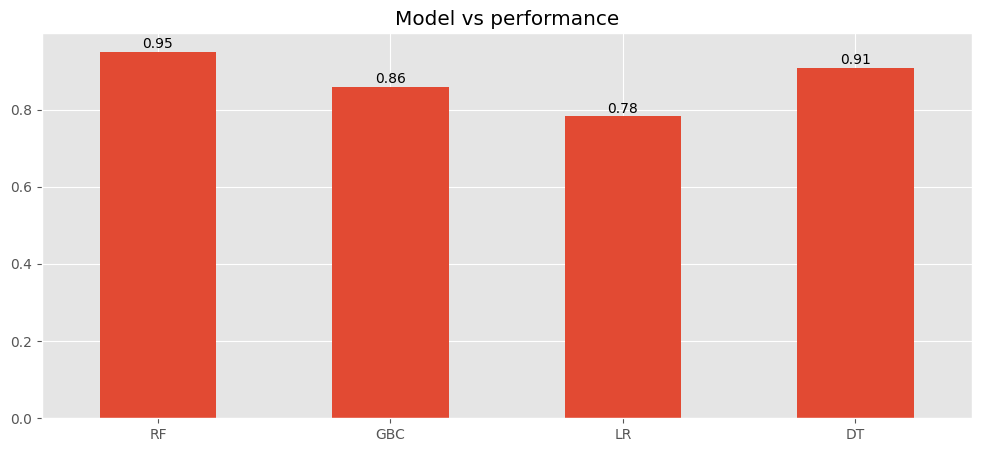

In [270]:
score.plot(kind='bar',figsize=(12,5))
plt.title('Model vs performance')
plt.xticks(rotation=0,ha='center')

for i,v in enumerate(score):
    plt.text(i,v +0.01,str(round(v,2)),ha='center')

plt.show()   

In [226]:
import pickle
pickle.dump(rf,open('stroke_model','wb'))